In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
from collections import Counter

In [2]:
# Load the iris dataset
iris = load_iris()

# Create a dataframe, np.c_ is used to concatenate the columns
iris_df = pd.DataFrame(data = np.c_[iris['data'], iris['target']], 
                        columns = iris['feature_names'] + ['target'])

iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [3]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
x = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

In [5]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [7]:
# Split the dataset into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.2,
                                                    shuffle = True,
                                                    random_state = 0)
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [8]:
print(f'train set: {x_train.shape} \ntest set: {x_test.shape}')

train set: (120, 4) 
test set: (30, 4)


In [9]:
scaler = Normalizer().fit(x_train) # the scaler is fitted to the training data
normalized_x_train = scaler.transform(x_train) # the scaler is used to transform the training data
normalized_x_test = scaler.transform(x_test) # the scaler is used to transform the test data

In [10]:
print('x train before Normalization')
print(x_train[:5])
print('x train after Normalization')
print(normalized_x_train[:5])

x train before Normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]
x train after Normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


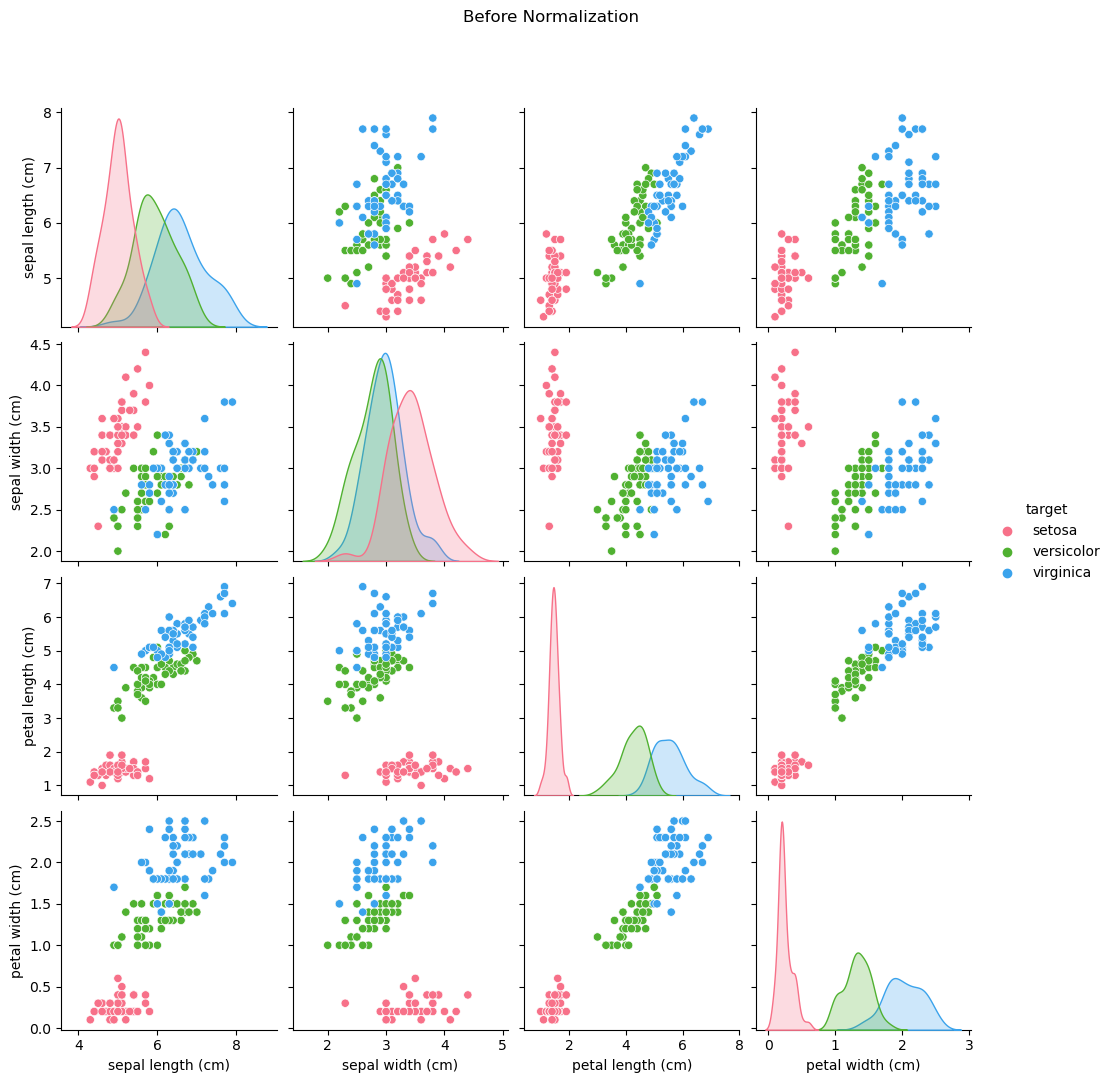

In [11]:
dic = {0.0: 'setosa', 1.0: 'versicolor', 2.0: 'virginica'}
before = sns.pairplot(iris_df.replace({'target': dic}), hue = 'target', palette = 'husl')
before.fig.suptitle('Before Normalization', y = 1.08)
before.fig.savefig('before_normalization.png')


In [12]:
## after normalization
iris_df_2 = pd.DataFrame(data = np.c_[normalized_x_train, y_train],
                        columns = iris['feature_names'] + ['target'])
dic = {0.0: 'setosa', 1.0: 'versicolor', 2.0: 'virginica'}
after = sns.pairplot(iris_df_2.replace({'target': dic}), hue = 'target', palette = 'husl')
after.fig.suptitle('After Normalization', y = 1.08)
after.fig.savefig('after_normalization.png')

In [24]:

#KNN Step 1: Calculate the distance between the test data and each row of the training data
def euclidean_distance(x_train, x_test_points):
    '''
    Input:
        x_train: training data
        x_test_points: test points
    Output:
        distance: the distance between the test points and each point in the training data.
    '''

    distances = [] # list to store the distances
    for row in range(len(x_train)):
        current_train_point = x_train[row] # get the current training point
        current_distance = 0 # initialize the distance to zero

        for col in range(len(current_train_point)):
            current_distance += (current_train_point[col] - x_test_points[col])**2
        current_distance = np.sqrt(current_distance)

        distances.append(current_distance)
    distances = pd.DataFrame(distances, columns = ['distance'])
    return distances



In [29]:
# KNN step 2: Get the k nearest neighbors

def nearest_neighbors(distance_point, K):
    '''
    Input:
        distance_point: the distance between the test point and each point in the training data
        K: the number of nearest neighbors
    Output:
        neighbors: the k nearest neighbors
    '''

    # sort the distance using sort_values function and only take first K neighbors using head function.
    neighbors = distance_point.sort_values(by=['distance'], axis=0).head(K)
    return neighbors

In [33]:
# KNN step 3: Get the majority vote of the k nearest neighbors
def majority_vote(neighbors, y_train):
    '''
    Input:
        neighbors: the k nearest neighbors
        y_train: the target values of the training data
    Output:
        y_pred: the prediction based on the majority voteing
    '''

    # Use the counter Object to get the labels with k nearest neighbors
    counter_vote = Counter(y_train[neighbors.index])

    y_pred = counter_vote.most_common()[0][0]
    return y_pred
    
    

In [34]:
#KNN Step 4: Creating the KNN model
def KNN_Scratch(x_train, y_train, x_test, K):
    '''
    Input:
        x_train: the training data
        y_train: the target values of the training data
        x_test: the test data
        K: the number of nearest neighbors
    Output:
        y_pred: the prediction based on the majority voteing
    '''

    y_pred = [] # list to store the predictions

    for x_test_point in x_test:
        # calculate the distance between the test point and each point in the training data
        distance_point = euclidean_distance(x_train, x_test_point)

        # get the k nearest neighbors
        neighbors = nearest_neighbors(distance_point, K)

        # get the majority vote of the k nearest neighbors
        y_pred_point = majority_vote(neighbors, y_train)

        # append the prediction to the list
        y_pred.append(y_pred_point)
    
    return y_pred


In [35]:
#KNN Step 5: Testing the Model
K = 3
y_pred = KNN_Scratch(normalized_x_train,y_train, normalized_x_test, K)
print(y_pred)

[2.0, 1.0, 0.0, 2.0, 0.0, 2.0, 0.0, 1.0, 1.0, 1.0, 2.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0, 2.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0, 1.0, 1.0, 0.0]


In [37]:
# Compare our model with the sklearn KNN model
knn = KNeighborsClassifier(n_neighbors = K)
knn.fit(normalized_x_train, y_train)
y_pred_sklearn = knn.predict(normalized_x_test)
print(y_pred_sklearn)

print('<--------------------------------------------------------->')
# Check is output is same
print(set(y_pred == y_pred_sklearn))

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 2. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]
<--------------------------------------------------------->
{True}


/Users/jayanthkorada/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [38]:
#Evaluate the Model
print('Accuracy of our model: ',accuracy_score(y_test,y_pred))
print('Accuracy of sklearn model: ',accuracy_score(y_test,y_pred_sklearn))

Accuracy of our model:  0.9666666666666667
Accuracy of sklearn model:  0.9666666666666667
